
# Fast Food Marketing Campaign A\B Test
## IBM Watson Analytics Marketing Campaign


https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"........WA_Marketing-Campaign.csv")

Tikrinsime kuri iš 3 reklamos kampanijų turi didžiausią efektą naujo produkto pardavimams. (Kurią kampaniją pasirinkti produkto reklamai)

Naujas produktas yra pristatytas atsitiktinai parinktose lokacijose. Skirtinga reklamos kampanija yra naudojama tose lokacijose. Surinkti pirmų 4 savaičių pardavimų duomenys.

In [4]:
df.head(5)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
df.shape

(548, 7)

In [6]:
df.dtypes, df.shape

(MarketID              int64
 MarketSize           object
 LocationID            int64
 AgeOfStore            int64
 Promotion             int64
 week                  int64
 SalesInThousands    float64
 dtype: object,
 (548, 7))

In [6]:
df.describe().round()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.0,548.0,548.0,548.0,548.0,548.0
mean,6.0,480.0,9.0,2.0,2.0,53.0
std,3.0,288.0,7.0,1.0,1.0,17.0
min,1.0,1.0,1.0,1.0,1.0,17.0
25%,3.0,216.0,4.0,1.0,2.0,43.0
50%,6.0,504.0,7.0,2.0,2.0,50.0
75%,8.0,708.0,12.0,3.0,3.0,60.0
max,10.0,920.0,28.0,3.0,4.0,100.0


In [7]:
df["Promotion"].unique()

array([3, 2, 1], dtype=int64)

In [22]:
df["MarketSize"].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [8]:
# Patikriname ar yra nulinių reikšmių

df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

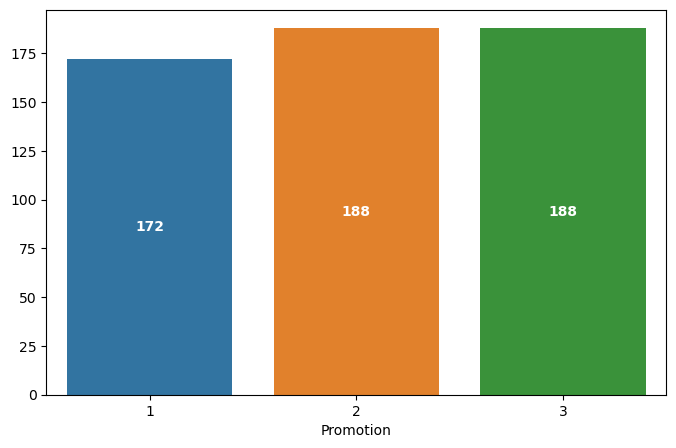

In [9]:
sales = df.groupby("Promotion")["SalesInThousands"].count()

plt.figure(figsize=(8, 5))
ax=sns.barplot(x=sales.index, y=sales.values)
ax.bar_label(ax.containers[0], fmt='%d', label_type='center', fontsize=10, color='white', fontweight='bold')

plt.show()

In [10]:
# Sugrupuojame duomenis pagal lokaciją. T.y. susumuojame 4 savaičių pardavimus

sugrupuota = df.groupby(["Promotion", "LocationID"], as_index=False).agg(bendri_pardavimai=("SalesInThousands", "sum"))

sugrupuota

,Promotion,LocationID,bendri_pardavimai
0,1,3,162.72
1,1,7,172.97
2,1,9,158.06
3,1,12,151.14
4,1,13,169.49
...,...,...,...
132,3,808,240.81
133,3,809,192.63
134,3,903,207.44
135,3,905,229.30


## Skaičiuojame pasikliautinį intervalą pažingsniui

In [13]:
# suskaičiuojame vidurkį
vidutiniai_pardavimai = sugrupuota[sugrupuota['Promotion'] == 3]['bendri_pardavimai'].mean().round(2)
print(vidutiniai_pardavimai)

221.46


In [16]:
# suskaičiuojame standartinį nuokrypį
std = sugrupuota[sugrupuota["Promotion"] == 3]["bendri_pardavimai"].std()
print(std)

65.53546268462364


In [17]:
# suskaičiuojame reikšmių skaičių
n = sugrupuota[sugrupuota["Promotion"] == 3]["bendri_pardavimai"].count()
print(n)

47


In [19]:
# surandame t statistiką
t_reiksme = stats.t.ppf((1 + 0.95) / 2, df=n-1)
print(t_reiksme)

2.0128955952945886


t reikšmė 2.01:

Jei apskaičiuota t statistika pagal duomenis viršija 2.01 (arba yra mažesnė nei −2.01),

tai reiškia, kad skirtumas tarp kampanijų yra per didelis, kad būtų paaiškintas vien atsitiktinumu.

t kritinė reikšmė apibrėžia, kada pastebėtas kampanijų skirtumas yra pakankamai didelis, kad būtų laikomas realiu, o ne atsitiktiniu.

In [20]:
# suskaičiuojame standartinę paklaidą
standartine_paklaida = std / np.sqrt(n)
print(standartine_paklaida)

9.559329707303213


In [21]:
# suskaičiuojame paklaidos ribą
margin_of_error = t_reiksme * standartine_paklaida
print(margin_of_error)

19.241932661799346


In [ ]:
# apskaičuojame pasikliautinį intervalą, nustatome apatinį ir viršutinį rėžius
pi_apatine, pi_virsutine = vidutiniai_pardavimai - margin_of_error, vidutiniai_pardavimai + margin_of_error
print(f"Pasikliautinis intervalas: ({pi_apatine:.2f}, {pi_virsutine:.2f})")

Pasikliautinis intervalas: (202.22, 240.70)


In [ ]:
# Funkcija pasikliautinių intervalų skaičiavimui. 

# Persivadinti pagal savo duomenis šiuos kintamuosius: sugrupuota, 'Promotion', 'bendri_pardavimai', marketingo_kampanija

reiksmingumo_lygis = 0.95
for marketingo_kampanija in sugrupuota['Promotion'].unique():
    pardavimai = sugrupuota[sugrupuota['Promotion'] == marketingo_kampanija]['bendri_pardavimai']
    vidurkis = pardavimai.mean()
    st_nuokrypis = pardavimai.std(ddof=1)
    n = pardavimai.count()
    margin_of_error = stats.t.ppf((1 + reiksmingumo_lygis) / 2, df=n-1) * (st_nuokrypis / np.sqrt(n))
    ci_lower, ci_upper = vidurkis - margin_of_error, vidurkis + margin_of_error
    print(f"{marketingo_kampanija}: {reiksmingumo_lygis*100}% Pasikliautinis intervalas: ({ci_lower:.2f}, {ci_upper:.2f})")

1: 95.0% Pasikliautinis intervalas: (212.67, 252.13)
2: 95.0% Pasikliautinis intervalas: (172.29, 206.34)
3: 95.0% Pasikliautinis intervalas: (202.22, 240.70)


## Funkcijos hipotezių tikrinimui

In [31]:
kampanija1 =sugrupuota[sugrupuota['Promotion']==1]['bendri_pardavimai']
kampanija3 = sugrupuota[sugrupuota['Promotion']==3]['bendri_pardavimai']
stat, p_value = stats.ttest_ind(kampanija1, kampanija3)
round = p_value.round(4)
print(round)

0.4264


Atmetame nulinę hipotezę jei p < alfa  
Alfa pasirenkame pagal norimą reikšmingumo lygį, 0,05, 0,01 ir t.t.

H0 - skirtumo nera  
H1 - skirtumas yra

0,4265 > 0.05  
Šiuo atveju p yra daugiau nei alfa, vadinasi neatmetame H0 ir teigiame, kad nėra statistiškai reikšmingo skirtimo tarp 1 ir 3 marketingo kampanijų

In [34]:
kampanija1 =sugrupuota[sugrupuota['Promotion']==1]['bendri_pardavimai']
kampanija2 = sugrupuota[sugrupuota['Promotion']==2]['bendri_pardavimai']
stat, p_value = stats.ttest_ind(kampanija1, kampanija2)
round = p_value.round(4)
print(round)

0.0012


In [35]:
kampanija3 =sugrupuota[sugrupuota['Promotion']==3]['bendri_pardavimai']
kampanija2 = sugrupuota[sugrupuota['Promotion']==2]['bendri_pardavimai']
stat, p_value = stats.ttest_ind(kampanija3, kampanija2)
round = p_value.round(4)
print(round)

0.0135
